In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in data 
df = pd.read_pickle("ETFs_encoded.pickle")

In [3]:
column_list = df.columns.tolist()

In [4]:
features = ['Bollinger_High',
 'Bollinger_Low',
 'Bollinger_MAVG',
 'High_scaled',
 'Low_scaled',
 'MACD_Hist',
 'MACD_Line',
 'MACD_Signal',
 'OBV',
 'Open_scaled',
 'RSI_14',
 'Volume',
 'Ticker_AGG',
 'Ticker_BND',
 'Ticker_DBC',
 'Ticker_DIA',
 'Ticker_DVY',
 'Ticker_EEM',
 'Ticker_EFA',
 'Ticker_EMB',
 'Ticker_EWA',
 'Ticker_EWC',
 'Ticker_EWG',
 'Ticker_EWH',
 'Ticker_EWJ',
 'Ticker_EWU',
 'Ticker_GLD',
 'Ticker_HYG',
 'Ticker_IAK',
 'Ticker_IAT',
 'Ticker_IAU',
 'Ticker_IBB',
 'Ticker_ICF',
 'Ticker_IDU',
 'Ticker_IEF',
 'Ticker_IGV',
 'Ticker_IHE',
 'Ticker_IHF',
 'Ticker_IHI',
 'Ticker_IJJ',
 'Ticker_IJK',
 'Ticker_IJS',
 'Ticker_IJT',
 'Ticker_ITB',
 'Ticker_ITOT',
 'Ticker_IUSG',
 'Ticker_IUSV',
 'Ticker_IVV',
 'Ticker_IWB',
 'Ticker_IWD',
 'Ticker_IWF',
 'Ticker_IWM',
 'Ticker_IWN',
 'Ticker_IWO',
 'Ticker_IWP',
 'Ticker_IWS',
 'Ticker_IYC',
 'Ticker_IYE',
 'Ticker_IYF',
 'Ticker_IYG',
 'Ticker_IYH',
 'Ticker_IYK',
 'Ticker_IYM',
 'Ticker_IYR',
 'Ticker_IYW',
 'Ticker_LQD',
 'Ticker_PFF',
 'Ticker_QQQ',
 'Ticker_REM',
 'Ticker_SCHA',
 'Ticker_SCHB',
 'Ticker_SCHE',
 'Ticker_SCHF',
 'Ticker_SCHX',
 'Ticker_SCHZ',
 'Ticker_SDY',
 'Ticker_SHY',
 'Ticker_SLV',
 'Ticker_SOXX',
 'Ticker_SPY',
 'Ticker_TLT',
 'Ticker_UNG',
 'Ticker_USO',
 'Ticker_VB',
 'Ticker_VBK',
 'Ticker_VBR',
 'Ticker_VEU',
 'Ticker_VIG',
 'Ticker_VNQ',
 'Ticker_VO',
 'Ticker_VOE',
 'Ticker_VOO',
 'Ticker_VOT',
 'Ticker_VTI',
 'Ticker_VTV',
 'Ticker_VUG',
 'Ticker_VWO',
 'Ticker_VYM',
 'Ticker_XLB',
 'Ticker_XLE',
 'Ticker_XLF',
 'Ticker_XLI',
 'Ticker_XLK',
 'Ticker_XLP',
 'Ticker_XLU',
 'Ticker_XLV',
 'Ticker_XLY']

In [5]:
dates = df["Date"]
train = dates < "2023-01-01"
test = dates >= "2023-01-01"

train1 = df[train]
test1 = df[test]

X_train = train1[features]
y_train = train1["Close_scaled"]

X_test = test1[features]
y_test = test1["Close_scaled"]

In [6]:
X_train

,Bollinger_High,Bollinger_Low,Bollinger_MAVG,High_scaled,Low_scaled,MACD_Hist,MACD_Line,MACD_Signal,OBV,Open_scaled,...,Ticker_VYM,Ticker_XLB,Ticker_XLE,Ticker_XLF,Ticker_XLI,Ticker_XLK,Ticker_XLP,Ticker_XLU,Ticker_XLV,Ticker_XLY
0,-1.783435,-1.695412,-1.748089,0.166569,-0.022953,0.378668,0.118529,0.009678,-1.559621,0.036513,...,False,False,False,False,False,False,False,False,False,False
1,-1.763268,-1.680200,-1.729790,0.060627,-0.118695,0.332293,0.083347,-0.013226,-1.668062,-0.180933,...,False,False,False,False,False,False,False,False,False,False
2,1.310393,1.545743,1.428290,0.261486,0.772432,0.778601,0.082036,-0.139092,-0.103832,0.757205,...,False,False,False,False,False,False,False,False,False,False
3,-1.401108,-1.355731,-1.381450,0.952535,0.503761,-0.058180,-0.167715,-0.159954,-1.707380,0.493841,...,False,False,False,False,False,False,False,False,False,False
4,-1.458438,-1.426738,-1.447548,0.197348,0.397898,0.069883,0.154179,0.141144,-2.345641,0.816873,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208900,0.506618,0.428234,0.469668,-0.445501,-0.096552,-1.396562,-1.414544,-1.020741,0.157223,0.345661,...,False,False,False,False,False,True,False,False,False,False
208901,1.205948,1.284644,1.246407,-0.720119,-1.295408,-1.191473,0.172907,0.618614,0.967415,-0.246798,...,False,False,False,False,False,False,True,False,False,False
208902,1.141388,1.312569,1.227556,-0.558719,-1.570397,-0.597865,0.609680,0.889811,0.919643,0.076624,...,False,False,False,False,False,False,False,True,False,False
208903,1.238425,1.280749,1.260734,-0.940853,-0.664243,-1.189093,0.069514,0.517080,1.071510,0.078971,...,False,False,False,False,False,False,False,False,True,False


In [7]:
model = RandomForestRegressor(n_estimators = 250, max_depth = 5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=250)

In [8]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print(rmse)
print(mae)
print(r2)

0.4282505684654895
0.3211912751776791
0.7496289190390022


In [16]:
# feature importance
importances = model.feature_importances_

# making df for readability
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


In [34]:
feature_importance_df[:50]

,Feature,Importance
4,Low_scaled,6.186750e-01
3,High_scaled,3.228384e-01
9,Open_scaled,4.423922e-02
5,MACD_Hist,6.987970e-03
6,MACD_Line,4.726469e-03
10,RSI_14,1.339311e-03
7,MACD_Signal,8.238829e-04
0,Bollinger_High,1.421427e-04
1,Bollinger_Low,9.170592e-05
2,Bollinger_MAVG,5.480632e-05


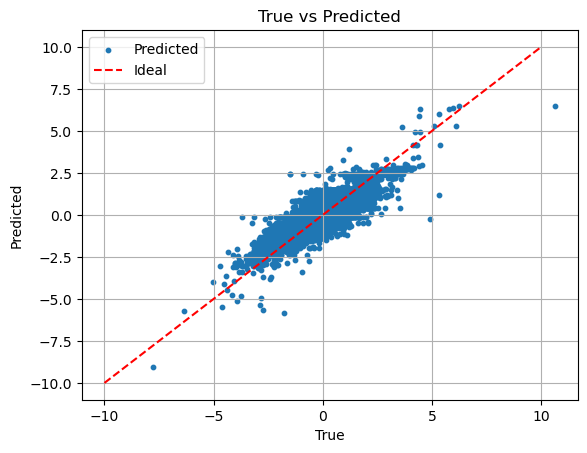

In [30]:
plt.scatter(y_test, y_pred, s = 10, label = "Predicted")
plt.plot([-10, 10], [-10, 10], 'r--', label = "Ideal")
plt.ylabel("Predicted")
plt.xlabel("True")
plt.title("True vs Predicted")
plt.grid()
plt.legend()
plt.savefig('RF_true_pred.png')

In [19]:
df_new

,Date,Bollinger_High,Bollinger_Low,Bollinger_MAVG,Close,Close_scaled,High_scaled,Low_scaled,MACD_Hist,MACD_Line,...,Ticker_VYM,Ticker_XLB,Ticker_XLE,Ticker_XLF,Ticker_XLI,Ticker_XLK,Ticker_XLP,Ticker_XLU,Ticker_XLV,Ticker_XLY
208905,2023-01-03,-0.100136,-0.300869,-0.199566,0.005877,1.781440,2.130174,1.315401,-2.772896,-0.057004,...,False,False,False,False,False,False,False,False,False,False
208906,2023-01-03,-0.078969,-0.270945,-0.173812,0.005290,1.565326,1.907191,0.984958,-2.720290,-0.058066,...,False,False,False,False,False,False,False,False,False,False
208907,2023-01-03,1.183487,1.300188,1.243629,-0.023935,-2.180214,-0.574358,-1.182035,0.729565,-0.426819,...,False,False,False,False,False,False,False,False,False,False
208908,2023-01-03,0.838983,0.876343,0.858624,-0.000332,-0.078607,0.797332,-0.050916,-0.772732,-0.486960,...,False,False,False,False,False,False,False,False,False,False
208909,2023-01-03,1.121678,1.236129,1.180511,-0.000497,-0.084591,0.138073,-0.087329,-0.461098,-0.131687,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259630,2025-02-19,2.288895,2.347728,2.318753,0.000083,-0.053708,0.278735,-0.028034,2.081235,0.754573,...,False,False,False,False,False,True,False,False,False,False
259631,2025-02-19,1.859127,1.815353,1.841023,0.008035,0.847979,1.089571,1.459601,1.699456,1.196654,...,False,False,False,False,False,False,True,False,False,False
259632,2025-02-19,2.052986,2.224089,2.142437,0.005261,0.404123,0.654996,0.577946,0.806236,0.826127,...,False,False,False,False,False,False,False,True,False,False
259633,2025-02-19,1.656767,1.742315,1.700720,0.013009,1.202650,1.224075,0.373033,-0.985352,0.701689,...,False,False,False,False,False,False,False,False,True,False


In [28]:
df_new = df[df["Date"] >= "2023-01-01"].copy() # new df to store the output data 

In [29]:
# unencode tickers
ticker_columns = [col for col in df_new.columns if col.startswith("Ticker_")]

df_new['Ticker'] = df_new[ticker_columns].idxmax(axis=1).str.replace("Ticker_", "")


In [30]:
# remove unneccesary columns
df_new = df_new.drop(features, axis=1)
df_new = df_new.drop(["Close"], axis=1)

In [31]:
df_new["Pred"] = y_pred

In [32]:
df_new

,Date,Close_scaled,Ticker,Pred
208905,2023-01-03,1.781440,AGG,1.516244
208906,2023-01-03,1.565326,BND,1.514477
208907,2023-01-03,-2.180214,DBC,-1.115822
208908,2023-01-03,-0.078607,DIA,0.175497
208909,2023-01-03,-0.084591,DVY,-0.117052
...,...,...,...,...
259630,2025-02-19,-0.053708,XLK,0.094672
259631,2025-02-19,0.847979,XLP,0.842724
259632,2025-02-19,0.404123,XLU,0.430165
259633,2025-02-19,1.202650,XLV,0.882111


In [33]:
# save data 
df_new.to_pickle("DF_pred_n250_depth5_encoded.pickle")